## OSEMN

The OSEMiN model consts of the following:
1. Obtain
2. Scrub
3. Explor
4. Model
5. Interpret

The Jupyter notebook will go over each process in order and revisit previous steps as new insights are obtained. The first step was set was loading the dataset into Jupyter through the use of the Pandas library. The second step of the OSEMN model is scrubbing the data, there were place holders and NaN values that needed to remove and replace. Exploring the data came next, when looking at the data we used various Pandas methods to look at visualize the data. For modeling the sklearn library was used. After modeling the data was interpreted with the most useful features.

# 1. Obtain

##  Data Retrieval

Using the Pandas library to import the csv file kc_house_data.csv

In [1]:
import pandas as pd

Importing the King's County data with the index as id.

In [2]:
data = pd.read_csv('kc_house_data.csv', index_col='id')
data2 = data.copy()
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [4]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Some of the columns are missing values, will need to look to see why that is.  Some of the data has types that don't match what it should be. For instance sqft_basement is considered an object, when it should be a number value either an integer or float. 

The missing values are due to NaN values. Replacing the NaN values and place holders with zeros.

sqft_basement has a '?' which turned the series into a object type. Replacing the '?' with 0.0 and turning the series into an int type.

## Data Preprocessing
#### Replacing NaN with the median values

In [5]:
data.yr_renovated = data.yr_renovated.fillna(0).astype(int)
data.waterfront = data.waterfront.astype(bool).astype(int)
data.view = data.view.fillna(0).astype(int)
data.sqft_basement = data.sqft_basement.replace('?','0.0').astype(float).astype(int)
data.date = pd.to_datetime(data.date).dt.month
data.price = data[['price']].astype(int)

## Exploratory Data Analysis

#### Questions
Now that the data has been preprocessed, we can look into the insights of the data by forming questions based on the features.
1. Which features are highly correlated with price
2. Does a house on the waterfront have a significant impact on price?
3. Are houses that have been renovated worth more?
4. To make a flexible model, which features should stay?

#### Features engineering

bed_bath: the combined number of bedrooms and bathrooms

sqft_bedbath: the amount of square footage taken from the bed_bath

sqft_other: the square footage of the house minus bed_bath

sqft_yard: the square footage of the front/back yard

renovated: whether the house has been renovated

basement: whether the house has a basement or not

In [6]:
data['bedbath'] = data['bedrooms'] + data['bathrooms']
data['sqft_bedbath'] = ((data.sqft_living / data.bedbath) / data.sqft_living) * data.sqft_living
#data['sqft_other'] = data.sqft_living - data.sqft_bedbath
data['sqft_yard'] = data.sqft_lot - data.sqft_living
# as we saw in the jointplot it looked like the amount of bins was only two
# 0 and the 2000's, so it makes sense to just change it to if the property
# has been renovated since its errection.
data['renovated'] = data.yr_renovated.astype(bool).astype(int)
data['basement'] = data.sqft_basement.astype(bool).astype(int)

## Checking for patterns
#### How do predictors relate to price?

In [7]:
data.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
sqft_bedbath     0.561588
bathrooms        0.525906
bedbath          0.467376
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
floors           0.256804
basement         0.178264
yr_renovated     0.117855
renovated        0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
sqft_yard        0.074584
waterfront       0.057305
yr_built         0.053953
condition        0.036056
long             0.022036
date            -0.009928
zipcode         -0.053402
Name: price, dtype: float64

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
def jointplot(data, X, y, kind='reg'):
    '''
    Create a pairplot for the specified data.
    data: the dataset to run through
    X: the features 
    y: the dependent variable
    kind: the type of joinplot to create
    '''
    for column in data.columns:
        sns.jointplot(x=X[column], y=y, data=data, kind=kind)

#### Pair Plots
Below is a pairplot between the target variable price and the features variables. These represent the relationship between the target and feature variables.

C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


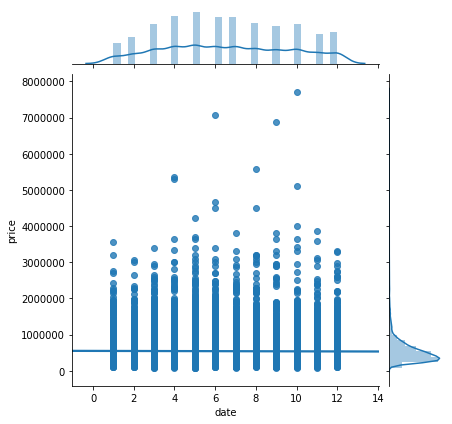

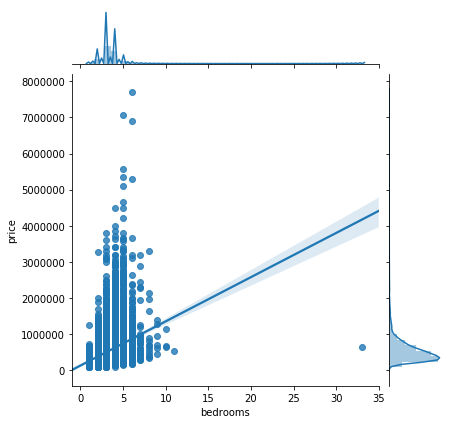

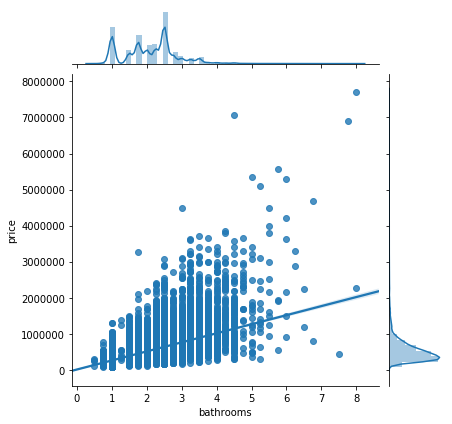

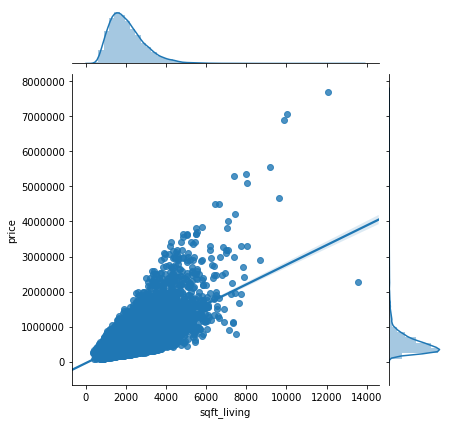

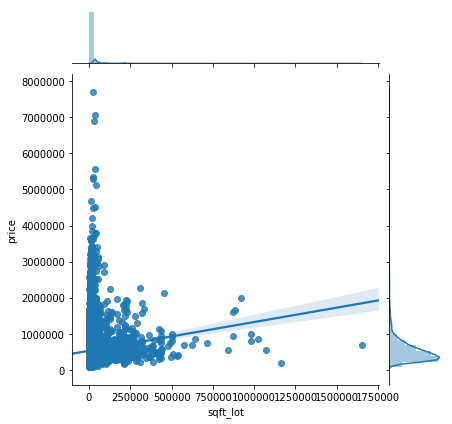

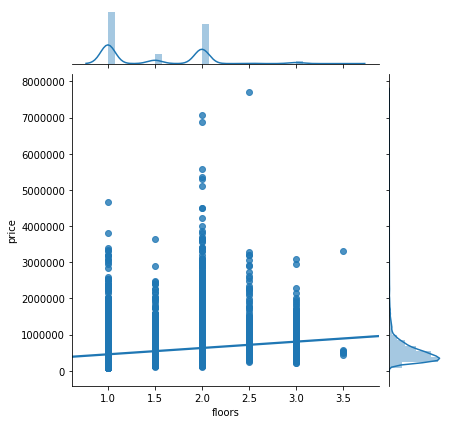

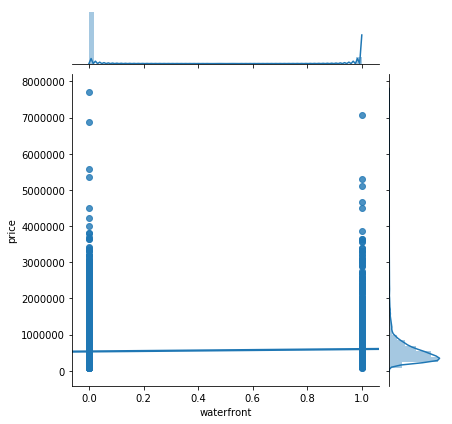

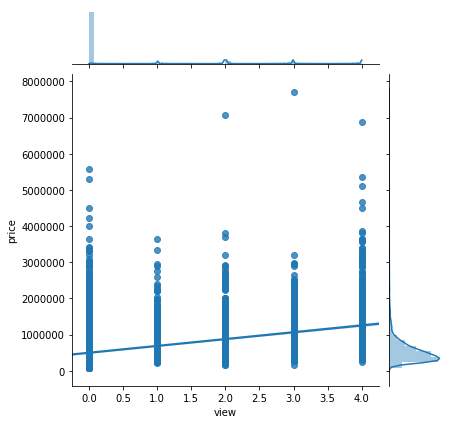

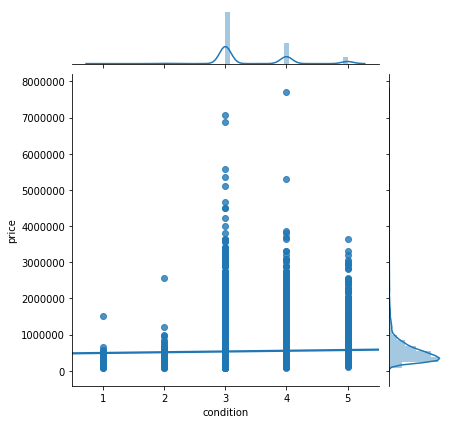

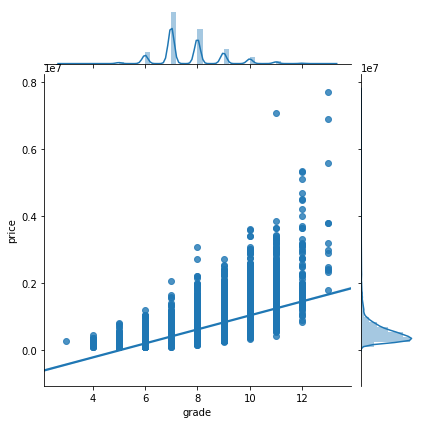

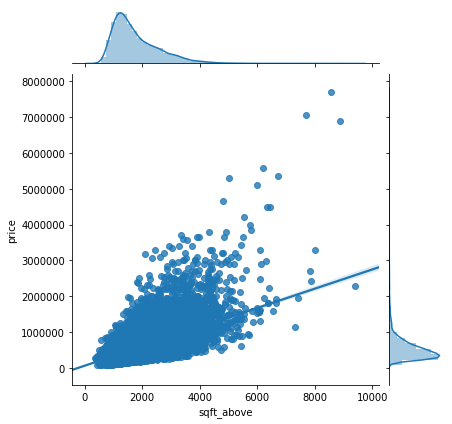

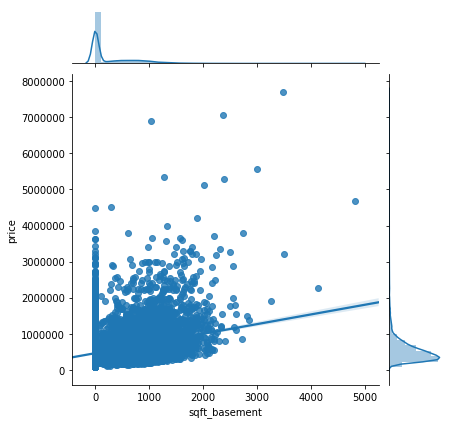

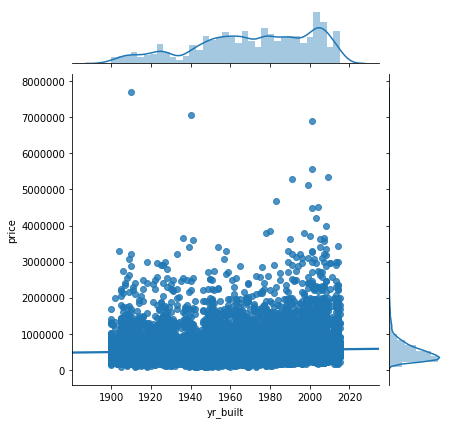

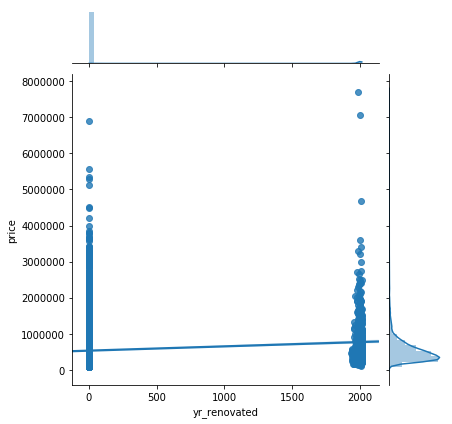

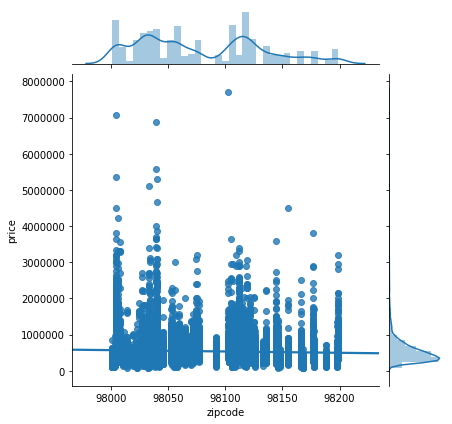

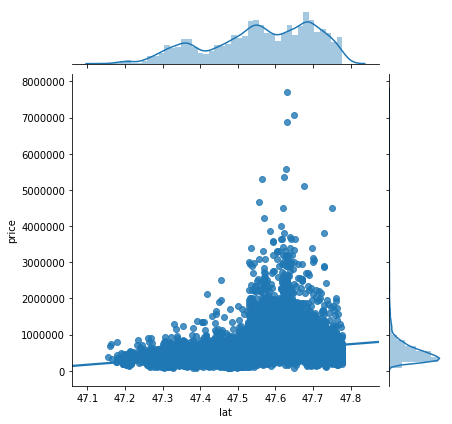

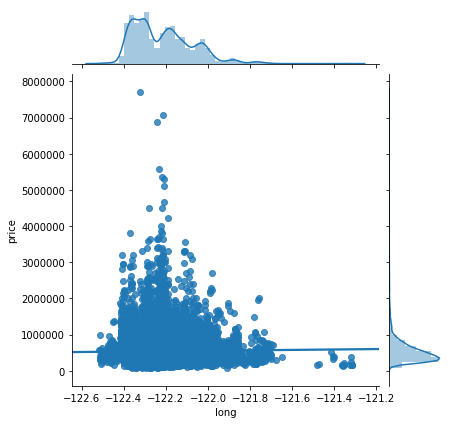

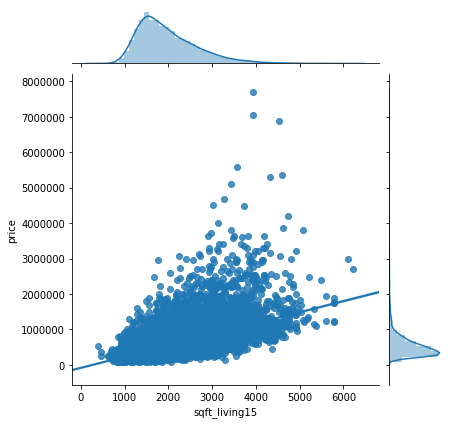

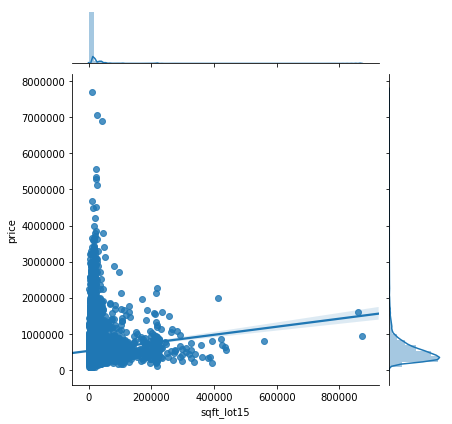

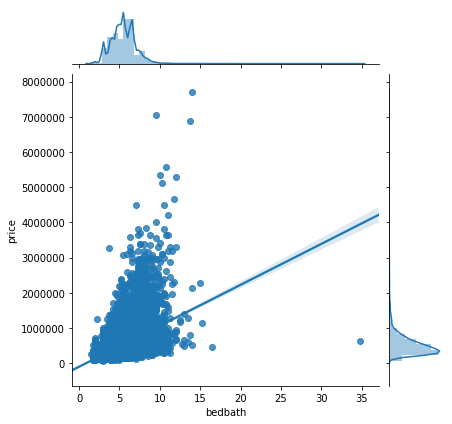

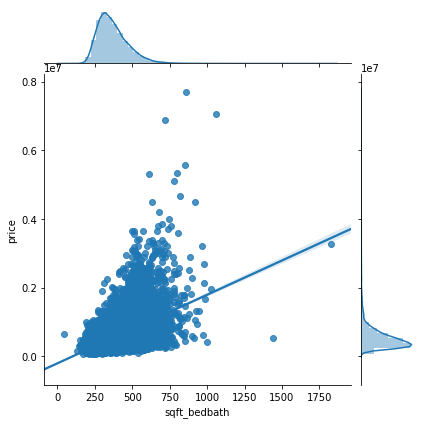

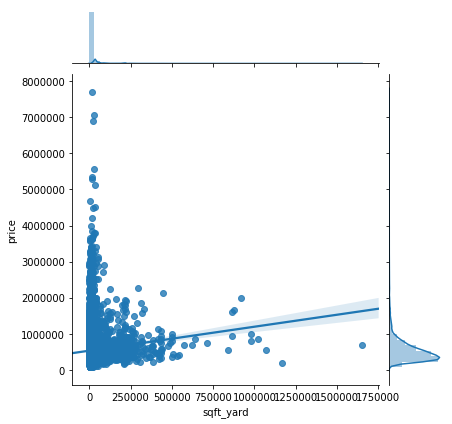

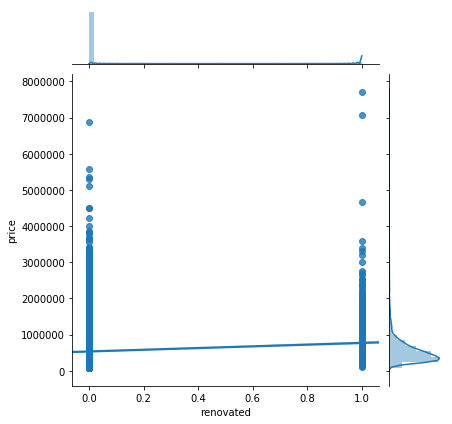

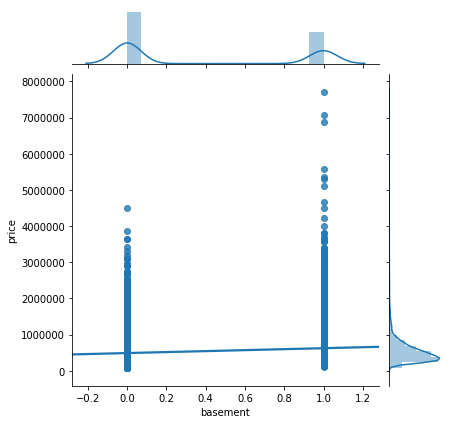

In [10]:
y = data.pop('price')
X = data

jointplot(data, X, y)

By creating the joinplot above we've answered two of the questions and that's if a house ont he water front has a significant impact on the price. 

Unfortunately the hypothesis that the waterfront feature has no signifcant effect on the price. It has a .05 correlation with price as shown by the jointplot.

The most impactful features to the target price are the following:
* sqft_living
* grade
* sqft_above
* sqft_living15
* sqft_bedbath
* bathrooms

It seems that the square footage of the house is the most significant predictor of the price of a home.

#### Checking for multicollinearity between predictors
With the jointplot and the correlation information above, there are some variables that do not have linearity with the target variable price. So we will remove those to keep in line with the linear regression assumption that predictors and the target needs have some kind of relationship.

In [11]:
# variables to drop due to lack of linear relationship
to_drop = ['date', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'renovated', 'basement']

In [15]:
data.corr().sqft_above.sort_values(ascending=False)

sqft_above       1.000000
sqft_living      0.876448
grade            0.756073
sqft_living15    0.731767
bathrooms        0.686668
sqft_bedbath     0.670848
bedbath          0.658030
floors           0.523989
bedrooms         0.479386
yr_built         0.424037
long             0.344842
sqft_lot15       0.195077
sqft_lot         0.184139
view             0.166017
sqft_yard        0.165305
yr_renovated     0.020645
renovated        0.020566
date             0.010153
waterfront       0.009043
lat             -0.001199
sqft_basement   -0.051175
condition       -0.158904
basement        -0.207268
zipcode         -0.261570
Name: sqft_above, dtype: float64

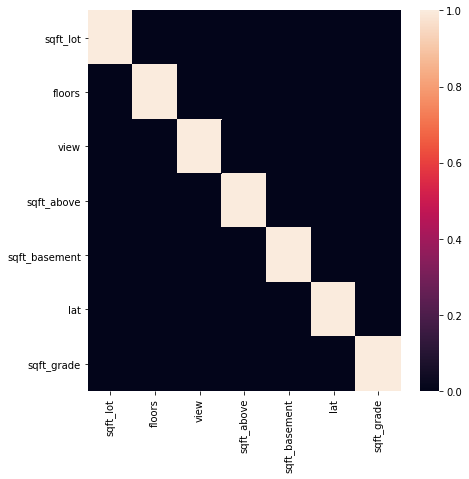

In [23]:
#'sqft_living', 'bedbath', 'sqft_living15', 'sqft_lot', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'sqft_bedbath', 'sqft_yard', 'bedrooms', 'bathrooms'
multicollinearity = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot15', 'bedbath', 'sqft_bedbath', 'sqft_yard']

for variable in multicollinearity:
    to_drop.append(variable)
    
plt.figure(figsize=(7,7))    
sns.heatmap(data.drop(columns=to_drop).corr() > 0.75)
plt.yticks()
plt.show()

#### New Features

It looks like grade and sqft_living are both highly correlated with price, but the dilemma is that they are both highly correlated with each. There are a couple of options.
1. Remove either grade or sqft_living
2. combine them into a meaningful feature

We'll go with option two. The grade per sqft. As Square footage increases the grade of the house increases.

In [18]:
data['sqft_grade'] = data['grade'] / data['sqft_living']

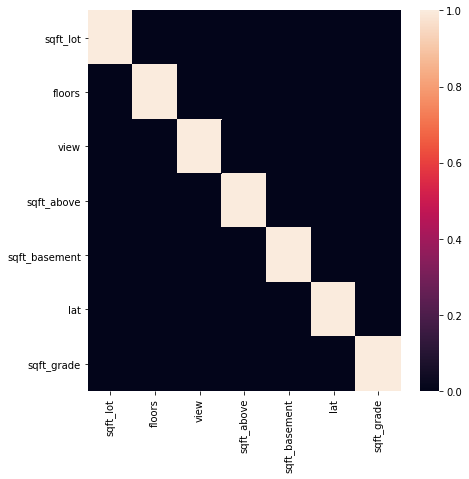

In [24]:
plt.figure(figsize=(7,7))    
sns.heatmap(data.drop(columns=to_drop).corr() > 0.75)
plt.yticks()
plt.show()

In [20]:
# the new list for the variable to_drop
to_drop.append('grade')

In [25]:
data.drop(columns=to_drop).corr()

,sqft_lot,floors,view,sqft_above,sqft_basement,lat,sqft_grade
sqft_lot,1.000000,-0.004814,0.075054,0.184139,0.015031,-0.085514,-0.128697
floors,-0.004814,1.000000,0.028414,0.523989,-0.241866,0.049239,-0.251147
view,0.075054,0.028414,1.000000,0.166017,0.270629,0.006321,-0.180723
sqft_above,0.184139,0.523989,0.166017,1.000000,-0.051175,-0.001199,-0.682197
sqft_basement,0.015031,-0.241866,0.270629,-0.051175,1.000000,0.109853,-0.419085
lat,-0.085514,0.049239,0.006321,-0.001199,0.109853,1.000000,0.017589
sqft_grade,-0.128697,-0.251147,-0.180723,-0.682197,-0.419085,0.017589,1.000000


Scatter plot based on lattitude and longitude to show where the concentration of houses are located.

The concentration of houses are located close to the waterfront.

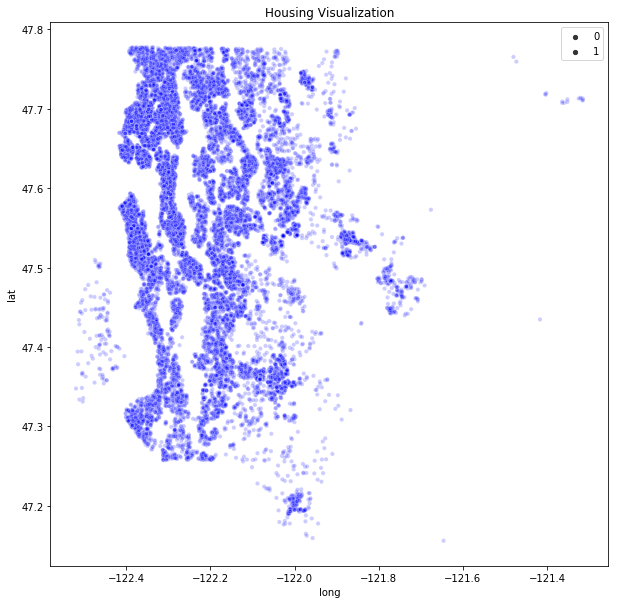

In [26]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='long', y='lat', alpha=0.2, size=1, color='b', data=data,)
plt.title('Housing Visualization')
plt.legend()
plt.show()

<img src='King_County_Map.gif'>

## Working with categorical variables
There a few categories that are ordinal categories. For instance the floors column has multiple floors and a house with 2 floors is supposed to be more than a house with 1 floor. The same can be said with bathrooms and beds, etc. 

Zipcode on the other hand has no value and that will be changed into a categorical variable.

With the jointplot there were a few varaibles that stood out as categorical. So here those variables will be changed accourdingly.

In [27]:
views = pd.get_dummies(data.view, drop_first=True, prefix='view')
floors = pd.get_dummies(data.floors, drop_first=True, prefix='floors')

feature_list = ['floors', 'view']

for feature in feature_list:
    to_drop.append(feature)

In [28]:
data.drop(columns=to_drop, inplace=True)

In [30]:
data.columns

Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'sqft_grade'], dtype='object')

In [31]:
df = pd.concat([data, floors, views], axis=1)
df.head()

,sqft_lot,sqft_above,sqft_basement,lat,sqft_grade,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4
id,,,,,,,,,,,,,,
7129300520,5650,1180,0,47.5112,0.005932,0,0,0,0,0,0,0,0,0
6414100192,7242,2170,400,47.7210,0.002724,0,1,0,0,0,0,0,0,0
5631500400,10000,770,0,47.7379,0.007792,0,0,0,0,0,0,0,0,0
2487200875,5000,1050,910,47.5208,0.003571,0,0,0,0,0,0,0,0,0
1954400510,8080,1680,0,47.6168,0.004762,0,0,0,0,0,0,0,0,0


##  Scaling the data using Standardization

In order to make a proper model, the data needs to be normally distributed. In order to do that the log method was from the Numpy library.

Also in order to make sure higher values don't over take lower values, for instance sqft is in the thousands and bedrooms are in the single digits, the data has been scaled.

C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


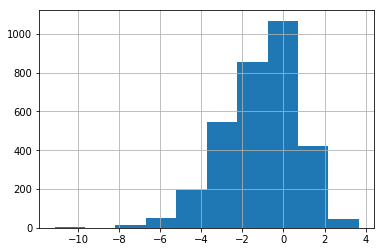

In [36]:
df['sqft_lot'] = (df['sqft_lot'] - np.mean(df['sqft_lot']))/np.sqrt(np.var(df['sqft_lot']))
np.log(df.sqft_lot).hist()

C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


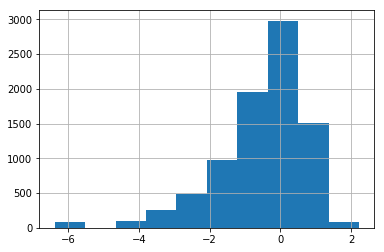

In [38]:
df['sqft_above'] = (df['sqft_above'] - np.mean(df['sqft_above'])) / np.sqrt(np.var(df['sqft_above']))
np.log(df['sqft_above']).hist()

C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


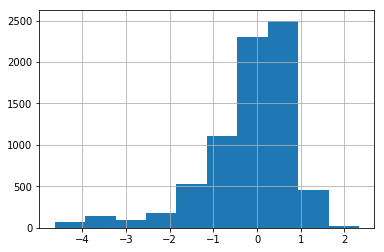

In [39]:
df['sqft_basement'] = (df['sqft_basement'] - np.mean(df['sqft_basement'])) / np.sqrt(np.var(df['sqft_basement']))
np.log(df['sqft_basement']).hist()

C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


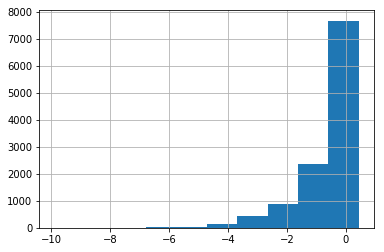

In [43]:
df['lat'] = (df['lat'] - np.mean(df['lat'])) / np.sqrt(np.var(df['lat']))
np.log(df['lat']).hist()

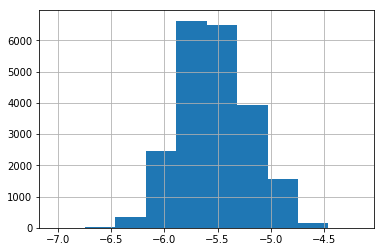

In [42]:
df['sqft_grade'] = np.log(df['sqft_grade'])
df['sqft_grade'].hist()

C:\Users\nitdip\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


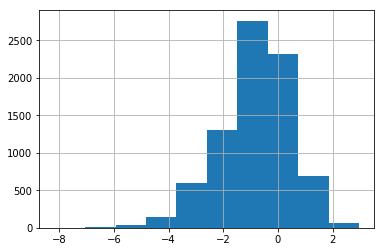

In [44]:
y = (y - np.mean(y)) / np.sqrt(np.var(y))
np.log(y).hist()

## Dividing the data in Test/Train sets

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42,)

## Linear Regression

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
sqft_lot         21597 non-null float64
sqft_above       21597 non-null float64
sqft_basement    21597 non-null float64
lat              21597 non-null float64
sqft_grade       21597 non-null float64
floors_1.5       21597 non-null uint8
floors_2.0       21597 non-null uint8
floors_2.5       21597 non-null uint8
floors_3.0       21597 non-null uint8
floors_3.5       21597 non-null uint8
view_1           21597 non-null uint8
view_2           21597 non-null uint8
view_3           21597 non-null uint8
view_4           21597 non-null uint8
dtypes: float64(5), uint8(9)
memory usage: 1.2 MB


In [47]:
import statsmodels.api as sm

constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     2023.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:42:52   Log-Likelihood:                -16202.
No. Observations:               17277   AIC:                         3.243e+04
Df Residuals:                   17263   BIC:                         3.254e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_lot         -0.0218      0.005     -4.363      0.000      -0.032      -0.012
sqft_above        0.6022      0.006     99.103      0.000       0.590       0.614
sqft_basement     0.2613      0.005     50.583      0.000       0.251       0.271
lat               0.2672      0.005     55.439      0.000       0.258       0.277
sqft_grade        0.0111      0.001      7.831      0.000       0.008       0.014
floors_1.5        0.1090      0.018      6.219      0.000       0.075       0.143
floors_2.0       -0.0646      0.013     -4.858      0.000      -0.091      -0.039
floors_2.5        0.5862      0.056     10.413      0.000       0.476       0.697
floors_3.0        0.0771      0.029      2.639      0.008       0.020       0.134
floors_3.5        0.5808      0.234      2.483      0.013       0.122       1.039
view_1            0.5018      0.039     12.818      0.000       0.425       0.579
view_2            0.3639      0.023     15.519      0.000       0.318       0.410
view_3            0.6774      0.032     21.026      0.000       0.614       0.741
view_4            1.6505      0.039     41.889      0.000       1.573       1.728
==============================================================================
Omnibus:                    12875.105   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           695392.479
Skew:                           3.065   Prob(JB):                         0.00
Kurtosis:                      33.470   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [49]:
linreg.score(X_train, y_train)

0.6709348311158262

In [50]:
linreg.score(X_test, y_test)

0.6678094337731211

In [51]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {np.sqrt(train_mse)}')
print(f'Test MSE: {np.sqrt(test_mse)}')

Train MSE: 0.5761379877532596
Test MSE: 0.5661543584469705


## Using Cross Validation
#### Model 1

In [54]:
linreg2 = LinearRegression()
linreg2.fit(df, y)
y_pred = linreg2.predict(df)

In [57]:
linreg2.score(df, y)

0.6704853603599469

In [55]:
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg2, df, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg2, df, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg2, df, y, cv=20, scoring='neg_mean_squared_error'))

In [56]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.3317887771265011
-0.33161169278792835
-0.3311857902071794


#### Model 2

In [82]:
df3 = df.iloc[:, 0:5]
print(df3.columns)
linreg3 = LinearRegression()
linreg3.fit(df3, y)
y_pred = linreg2.predict(df)

Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'sqft_grade'], dtype='object')


In [66]:
linreg3.score(df3, y)

0.6245514927404121

In [67]:
cv_5_results = np.mean(cross_val_score(linreg3, df3, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg3, df3, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg3, df3, y, cv=20, scoring='neg_mean_squared_error'))

In [68]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.376826907462231
-0.37685979078415843
-0.3765145398193995


By dropping the categorical variables the model has increased by 4% making the accuracy of the predictions 37.68%.

#### Model 3

In [81]:
df4 = df.iloc[:, 0:4]
print(df4.columns)
linreg4 = LinearRegression()
linreg4.fit(df4, y)
y_pred = linreg4.predict(df4)

Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'lat'], dtype='object')


In [72]:
linreg4.score(df4, y)

0.5638643143767972

In [78]:
cv_5_results = np.mean(cross_val_score(linreg4, df4, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg4, df4, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg4, df4, y, cv=20, scoring='neg_mean_squared_error'))

In [79]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.4372013280606235
-0.4372265050488478
-0.43693819263074757


#### Model 4

In [89]:
df5 = df[['sqft_lot', 'sqft_above', 'lat', 'sqft_grade']]
print(df5.columns)
linreg5 = LinearRegression()
linreg5.fit(df5, y)
y_pred5 = linreg5.predict(df5)

Index(['sqft_lot', 'sqft_above', 'lat', 'sqft_grade'], dtype='object')


In [91]:
linreg5.score(df5, y)

0.4672360796540884

In [92]:
cv_5_results = np.mean(cross_val_score(linreg5, df5, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg5, df5, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg5, df5, y, cv=20, scoring='neg_mean_squared_error'))

In [93]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.5340167109990601
-0.5341832957002606
-0.5337542072407716


# Conclusion

The model that gave the best score was the initial mode with the following features:
* Sqft_lot
* Sqft_above
* Sqft_basement
* Lat
* Sqft_grade
* Floors
* View